<a href="https://colab.research.google.com/github/jaab/AI---Deep-Learning-com-PyTorch-e-Python/blob/main/Project_2_brest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECTO 2 CLASSIFICAÇÃO BINÁRIA BREST CANCER COM VALIDAÇÃO CRUZADA DROPOUT

Etapa 1: Importação das bibliotecas

In [ ]:
#!pip install skorch  #instalação da biblioteca skorch


In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn
from skorch import NeuralNetBinaryClassifier
import torch
import seaborn as sns
from sklearn.model_selection import cross_val_score
torch.__version__
#!pip install torch==1.11.0

'1.11.0+cu102'

Etapa 2 : Base de Dados

UPLOAD TO FILES entradas_breast.csv AND saidas_breast.csv FROM YOUR PC

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

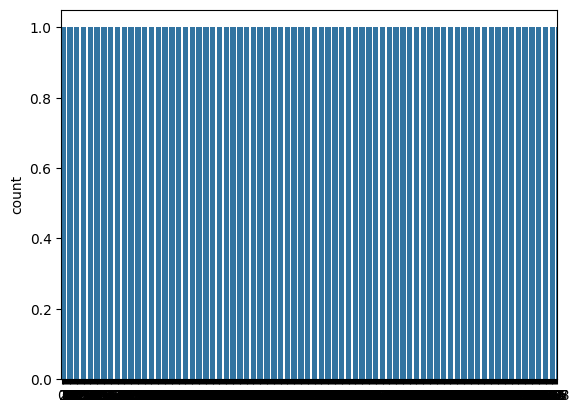

In [ ]:
sns.countplot(classe['0']);

In [ ]:
classe.shape

(569, 1)

In [ ]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

In [ ]:
classe.shape

(569,)

In [ ]:
type(classe)

numpy.ndarray

In [ ]:
type(previsores)

numpy.ndarray

Etapa 3: Classe para estrutura da rede neural

In [ ]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30,16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()

    self.dense1 = nn.Linear(16,16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()

    self.dense2 = nn.Linear(16,1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.activation2 = nn.ReLU()

    self.output = nn.Sigmoid()

  def forward(self,x):
    x = self.dense0(x)
    x = self.activation0(x)
    x = self.dense1(x)
    x = self.activation1(x)
    x = self.dense2(x)
    x = self.activation2(x)
    x = self.output(x)
    return x


Etapa 4: Skorch

In [ ]:
classificador_sklearn = NeuralNetBinaryClassifier(
    module=classificador_torch,
    criterion=torch.nn.BCELoss,
    optimizer =torch.optim.Adam,
    lr=0.001,
    optimizer__weight_decay=0.0001,
    max_epochs=100,
    batch_size=10,
    train_split=False
    )

Etapa 5 : Validação Cruzada

In [ ]:
resultados= cross_val_score(classificador_sklearn, previsores, classe, cv=10 , scoring= 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.0654
      2       37.1094  0.0634
      3       37.1094  0.0711
      4       37.1094  0.0675
      5       37.1094  0.0624
      6       37.1094  0.0814
      7       37.1094  0.0682
      8       37.1094  0.0606
      9       37.1094  0.0701
     10       37.1094  0.0670
     11       37.1094  0.0642
     12       37.1094  0.0683
     13       37.1094  0.0768
     14       37.1094  0.0673
     15       37.1094  0.0631
     16       37.1094  0.0719
     17       37.1094  0.0668
     18       37.1094  0.0711
     19       37.1094  0.0675
     20       37.1094  0.0711
     21       37.1094  0.0764
     22       37.1094  0.0755
     23       37.1094  0.0764
     24       37.1094  0.0751
     25       37.1094  0.0665
     26       37.1094  0.0844
     27       37.1094  0.0735
     28       37.1094  0.0674
     29       37.1094  0.0659
     30       37.1094  0.0727
     31       37.1094  0.1007
     32   

In [ ]:
resultados.shape

(10,)

In [ ]:
resultados

array([0.61403509, 0.38596491, 0.36842105, 0.43859649, 0.36842105,
       0.36842105, 0.36842105, 0.63157895, 0.43859649, 0.625     ])

In [ ]:
media = resultados.mean()
media

0.4607456140350877

In [ ]:
desvio_padrao = resultados.std()
desvio_padrao

0.10969494656518622

Etapa 6: Dropout

In [ ]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30,16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dropout0 = nn.Dropout(0.2)

    self.dense1 = nn.Linear(16,16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)

    self.dense2 = nn.Linear(16,1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.activation2 = nn.ReLU()
    self.dropout2 = nn.Dropout(0.2)

    self.output = nn.Sigmoid()

  def forward(self,x):
    x = self.dense0(x)
    x = self.activation0(x)
    x = self.dropout0(x)
    x = self.dense1(x)
    x = self.activation1(x)
    x = self.dropout1(x)
    x = self.dense2(x)
    x = self.activation2(x)
    x = self.dropout2(x)
    x = self.output(x)
    return x

In [ ]:
classificador_sklearn = NeuralNetBinaryClassifier(
    module=classificador_torch,
    criterion=torch.nn.BCELoss,
    optimizer =torch.optim.Adam,
    lr=0.001,
    optimizer__weight_decay=0.0001,
    max_epochs=100,
    batch_size=10,
    train_split=False
    )

In [ ]:
resultados= cross_val_score(classificador_sklearn, previsores, classe, cv=10 , scoring= 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       31.1738  0.1911
      2       30.4061  0.1853
      3       29.2437  0.1958
      4       31.5563  0.1923
      5       30.2176  0.1760
      6       29.4228  0.1090
      7       30.9826  0.1021
      8       28.8490  0.1036
      9       28.6456  0.1131
     10       29.6249  0.1407
     11       28.6632  0.1012
     12       29.0592  0.1144
     13       29.2342  0.1011
     14       30.4156  0.1291
     15       31.1847  0.1037
     16       30.9880  0.0938
     17       29.2451  0.0816
     18       29.8107  0.0963
     19       29.0322  0.1503
     20       29.6303  0.0998
     21       31.3800  0.1204
     22       30.4020  0.1034
     23       32.3484  0.1087
     24       31.5740  0.0851
     25       16.2458  0.0830
     26        0.6931  0.0803
     27        0.6931  0.0770
     28        0.6931  0.0938
     29        0.6931  0.1345
     30        0.6918  0.0875
     31        0.6931  0.0775
     32   

In [ ]:
media = resultados.mean()
desvio_padrao = resultados.std()
media, desvio_padrao

(0.4712092731829574, 0.13489615886436063)

In [ ]:
resultados

array([0.38596491, 0.38596491, 0.63157895, 0.36842105, 0.40350877,
       0.36842105, 0.36842105, 0.77192982, 0.43859649, 0.58928571])